<a href="https://colab.research.google.com/github/MarioMachadodeOliveira/Atividade/blob/main/Trabalho.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

import kagglehub

# Download latest version
path = kagglehub.dataset_download("deepcontractor/car-price-prediction-challenge")

print("Path to dataset files:", path)

100%|██████████| 429k/429k [00:00<00:00, 589kB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/deepcontractor/car-price-prediction-challenge/versions/1


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.preprocessing import OneHotEncoder

print("Bibliotecas importadas com sucesso!")

Bibliotecas importadas com sucesso!


In [ ]:
data = {
    'Ano': np.random.randint(2010, 2024, 500),
    'Quilometragem': np.random.randint(10000, 150000, 500),
    'Potencia_Motor': np.random.randint(70, 400, 500),
    'Marca': np.random.choice(['Toyota', 'Ford', 'Honda', 'BMW', 'Fiat'], 500),
    'Combustivel': np.random.choice(['Gasolina', 'Diesel', 'Flex'], 500)
}
df = pd.DataFrame(data)

df['Preco'] = (df['Ano'] * 100) + (df['Potencia_Motor'] * 150) - (df['Quilometragem'] * 0.1) + np.random.normal(0, 5000, 500)

print("Amostra dos dados:")
display(df.head())

Amostra dos dados:


,Ano,Quilometragem,Potencia_Motor,Marca,Combustivel,Preco
0,2022,32752,271,Honda,Gasolina,245255.879282
1,2019,87761,220,Toyota,Diesel,228220.841612
2,2011,116954,249,Toyota,Gasolina,225273.337316
3,2014,63445,305,Fiat,Flex,238264.035516
4,2014,148875,196,Fiat,Diesel,213596.904557


# Nova seção

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
df_pronto = pd.get_dummies(df, columns=['Marca', 'Combustivel'], drop_first=True)

X = df_pronto.drop('Preco', axis=1)
y = df_pronto['Preco']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"\nDados divididos: {X_train.shape[0]} para treino e {X_test.shape[0]} para teste.")


Dados divididos: 400 para treino e 100 para teste.


In [ ]:
modelos = {
    "Regressão Linear": LinearRegression(),
    "Árvore de Decisão": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42)
}

resultados = {'Modelo': [], 'R2 Score': [], 'MAE (Erro Médio)': []}

print("--- Iniciando Treinamento ---")

for nome, modelo in modelos.items():

    modelo.fit(X_train, y_train)

    y_pred = modelo.predict(X_test)

    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)

    resultados['Modelo'].append(nome)
    resultados['R2 Score'].append(r2)
    resultados['MAE (Erro Médio)'].append(mae)

    print(f"Modelo: {nome} | R²: {r2:.4f} | Erro Médio: R$ {mae:.2f}")

--- Iniciando Treinamento ---
Modelo: Regressão Linear | R²: 0.8757 | Erro Médio: R$ 4588.91
Modelo: Árvore de Decisão | R²: 0.7009 | Erro Médio: R$ 7116.13
Modelo: Random Forest | R²: 0.8475 | Erro Médio: R$ 4978.08


/tmp/ipython-input-3617929942.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='R2 Score', y='Modelo', data=df_res, palette='viridis')


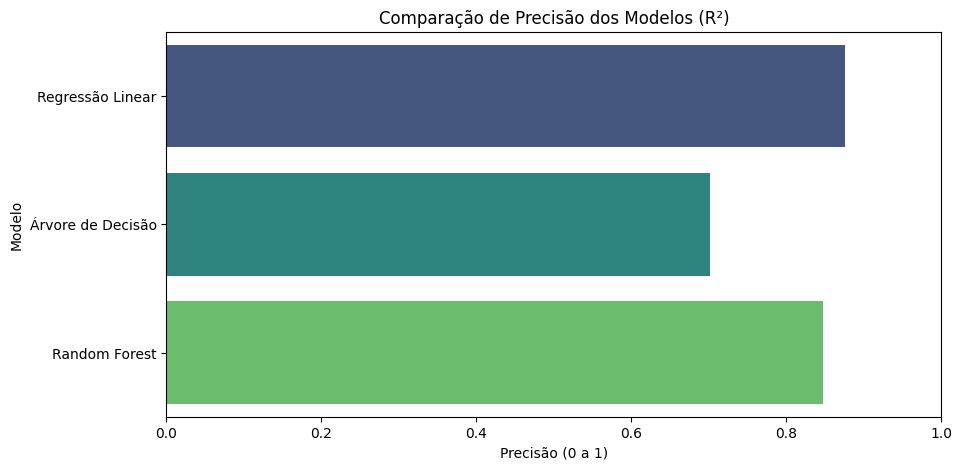


>> CONCLUSÃO: O melhor modelo foi 'Regressão Linear'
Ele explica 87.6% da variação dos preços.


In [ ]:
df_res = pd.DataFrame(resultados)

plt.figure(figsize=(10, 5))
sns.barplot(x='R2 Score', y='Modelo', data=df_res, palette='viridis')
plt.title('Comparação de Precisão dos Modelos (R²)')
plt.xlim(0, 1) # R2 vai de 0 a 1
plt.xlabel('Precisão (0 a 1)')
plt.show()

melhor_modelo = df_res.loc[df_res['R2 Score'].idxmax()]
print(f"\n>> CONCLUSÃO: O melhor modelo foi '{melhor_modelo['Modelo']}'")
print(f"Ele explica {melhor_modelo['R2 Score']:.1%} da variação dos preços.")